Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


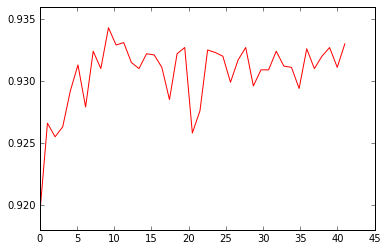

In [14]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt
import numpy as np

# 载入数据
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

# 定义每个批次的大小
batch_size = 100
period_epoch = 41
acc_list = np.empty(period_epoch)

# 批次的大小
batch_size = 128
n_batch = mnist.train.num_examples // batch_size

x = tf.placeholder(tf.float32, [None,784])
y = tf.placeholder(tf.float32, [None, 10])

# 创建一个简单的神经网络
W = tf.Variable(tf.zeros([784,10]))
b = tf.Variable(tf.zeros([1,10]))
prediction = tf.nn.softmax(tf.matmul(x,W) + b)

# 代价函数
# loss = tf.reduce_mean(tf.square(y-prediction))
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y, logits=prediction))

# 梯度下降法
# train_step = tf.train.GradientDescentOptimizer(0.2).minimize(loss)
train_step = tf.train.AdamOptimizer(1e-2).minimize(loss)

# 初始化变量
init = tf.global_variables_initializer()

# 得到一个布尔型列表，存放结果是否正确
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(prediction,1)) #argmax 返回一维张量中最大值索引

# 求准确率
accuracy = tf.reduce_mean(tf.cast(correct_prediction,tf.float32)) # 把布尔值转换为浮点型求平均数

with tf.Session() as sess:
    sess.run(init)
    for epoch in range(period_epoch):
        for batch in range(n_batch):
            # 获得批次数据
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            sess.run(train_step, feed_dict={x:batch_xs, y:batch_ys})
        acc = sess.run(accuracy, feed_dict={x:mnist.test.images,y:mnist.test.labels})
        print("Iter " + str(epoch) + " Testing Accuracy: " + str(acc), end='\r')
        acc_list[epoch] = acc
        
# 画图
axis = np.linspace(0, period_epoch, period_epoch)
plt.figure()
plt.plot(axis, acc_list, 'r-')
plt.show()